## Task2: Importing Libraries and Exploring the DataSet

In [1]:
import numpy as np  #linear algebra
import pandas as pd #data processing,CSV file (e.g. pd.read_csv)
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
import copy
sns.set()  #setting the default seaborn style for our plots

In [2]:
#Read the Dataset
insurance_df=pd.read_csv('insurance-data.csv')

In [3]:
#Display the first 10 Examples in the dataset
insurance_df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [4]:
#Info about the data shape of data,type od individual columns

insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


<h3>Expected Output:</h3>
    <p> . The data should consist of 1338 instances with 7 attributes. <p>
    <p> . 2 type integer, 2 type float and 3 type object<p> 

## Task3 : Checking missing values and Outliers

In [5]:
#Check for the null values
insurance_df.isna().apply(pd.value_counts)

,age,sex,bmi,children,smoker,region,charges
False,1338,1338,1338,1338,1338,1338,1338


In [11]:
insurance_df.isnull().sum()   #missing values for each column

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

There should not be any missing values

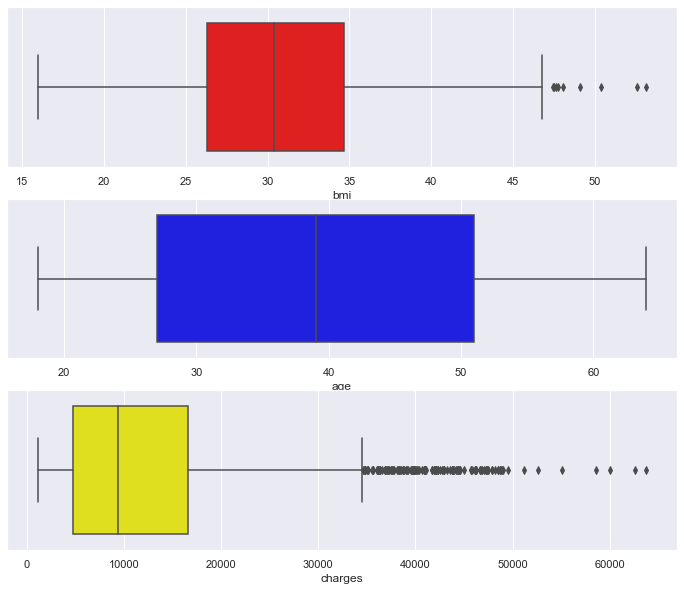

In [17]:
#Check for the outliers   #aykiri degerler kontrolü
plt.figure(figsize=(12,10))
plt.subplot(3,1,1)
sns.boxplot(x=insurance_df.bmi,color='red')

plt.subplot(3,1,2)
sns.boxplot(x=insurance_df.age,color='blue')

plt.subplot(3,1,3)
sns.boxplot(x=insurance_df.charges,color='yellow')



plt.show()

<h3> Output:<h3>
    <div>
    <strong>*bmi<strong> has a few extreme values.<br>     
    <strong>*charges<strong> as it is highly skewed,there are quiet a lot of extreme values.
    <div>

In [18]:
# a brief summary for the dataset

insurance_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


<strong>Output should include this Analysis:</strong>

<p>.All the statistics seem reasonable.<p>
<p>.Age column:data looks representative of the true age distribution of the adult population with (39) mean.<p>
<p>.Children Column: Few people have more than 2 children(75% of the people have 2 or less children)<p>
<p>.The claimed amount is higly skewed as most people would require basic medi-care and only few suffer from diseases which cost more to get rid of.<p>

## Task4 : Creating visual methods to analyze the data.

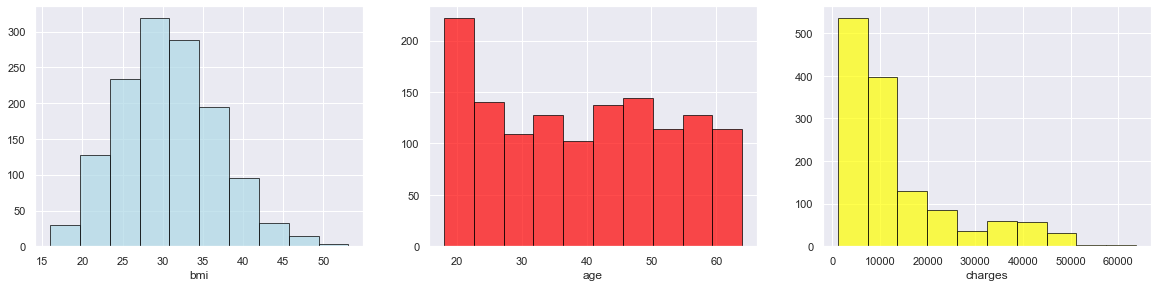

In [19]:
#Plots to see the distribution of the continuous features individully

plt.figure(figsize=(20,15))
plt.subplot(3,3,1)
plt.hist(insurance_df.bmi,color='lightblue',edgecolor='black',alpha=0.7)
plt.xlabel('bmi')

plt.subplot(3,3,2)
plt.hist(insurance_df.age,color='red',edgecolor='black',alpha=0.7)
plt.xlabel('age')

plt.subplot(3,3,3)
plt.hist(insurance_df.charges,color='yellow',edgecolor='black',alpha=0.7)
plt.xlabel('charges')

plt.show()

<strong>Output should include this Analysis:</strong>
    <p>. bmi looks normally distributed.<p>
    <p>. Age looks uniformly distributed.<p>
    <p>. As seen in the previous step,charges are highly skewed.<p>

In [20]:
# Showing the skewness of variables
Skewness=pd.DataFrame({'Skewness': [stats.skew(insurance_df.bmi),stats.skew(insurance_df.age),stats.skew(insurance_df.charges)]},
                     index=['bmi','age','charges'])  #Measure the skewness of the required columns

#We will Measure the skewness of the required columns
Skewness

,Skewness
bmi,0.283729
age,0.055610
charges,1.514180


<strong>Output should include this Analysis:</strong>
    <p>-Skewness of bmi is very low as seen in the previous step <p>
    <p>-age is uniformly distributed and thus not skewed<p>
    <p>-charges are highly skewed<p>

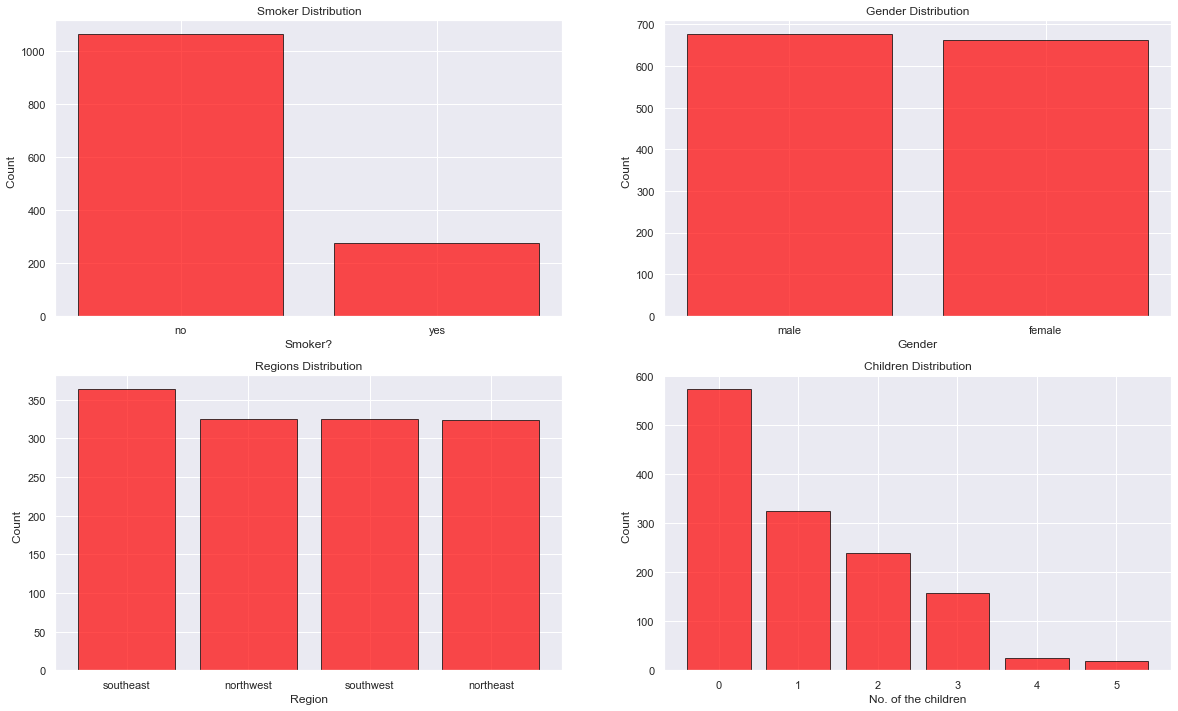

In [21]:
#Visualizing data to make analysis

plt.figure(figsize=(20,25))


x=insurance_df.smoker.value_counts().index  #values for x_axis
y=[insurance_df['smoker'].value_counts()[i] for i in x]  #Count of each class on y-axis

plt.subplot(4,2,1)
plt.bar(x,y,align='center',color='red',edgecolor='black',alpha=0.7)  #plot a bar chart
plt.xlabel('Smoker?')
plt.ylabel('Count  ')
plt.title('Smoker Distribution')

#For Genderplot
x1=insurance_df.sex.value_counts().index  #values for x_axis
y1=[insurance_df['sex'].value_counts()[j] for j in x1]  #Count of each class on y-axis


plt.subplot(4,2,2)
plt.bar(x1,y1,align='center',color='red',edgecolor='black',alpha=0.7)
plt.xlabel('Gender')
plt.ylabel('Count  ')
plt.title('Gender Distribution')

#For RegionPlot
x2=insurance_df.region.value_counts().index  #values for x_axis
y2=[insurance_df['region'].value_counts()[k] for k in x2]  #Count of each class on y-axis


plt.subplot(4,2,3)
plt.bar(x2,y2,align='center',color='red',edgecolor='black',alpha=0.7)
plt.xlabel('Region')
plt.ylabel('Count  ')
plt.title('Regions Distribution')

#For ChildrenPlot
x3=insurance_df.children.value_counts().index  #values for x_axis
y3=[insurance_df['children'].value_counts()[l] for l in x3]  #Count of each class 


plt.subplot(4,2,4)
plt.bar(x3,y3,align='center',color='red',edgecolor='black',alpha=0.7)
plt.xlabel('No. of the children')
plt.ylabel('Count  ')
plt.title('Children Distribution')

plt.show()

<strong>Output should include this Analysis:</strong>
    <p>-There are lot more non-smokers than smokers.<p>
    <p>-Instances are distributed evenly across all regions<p>
    <p>-Gender is also distributed evenly<p>
    <p>-Most instances have less than 3 children and very few have 4 or 5 children<p>

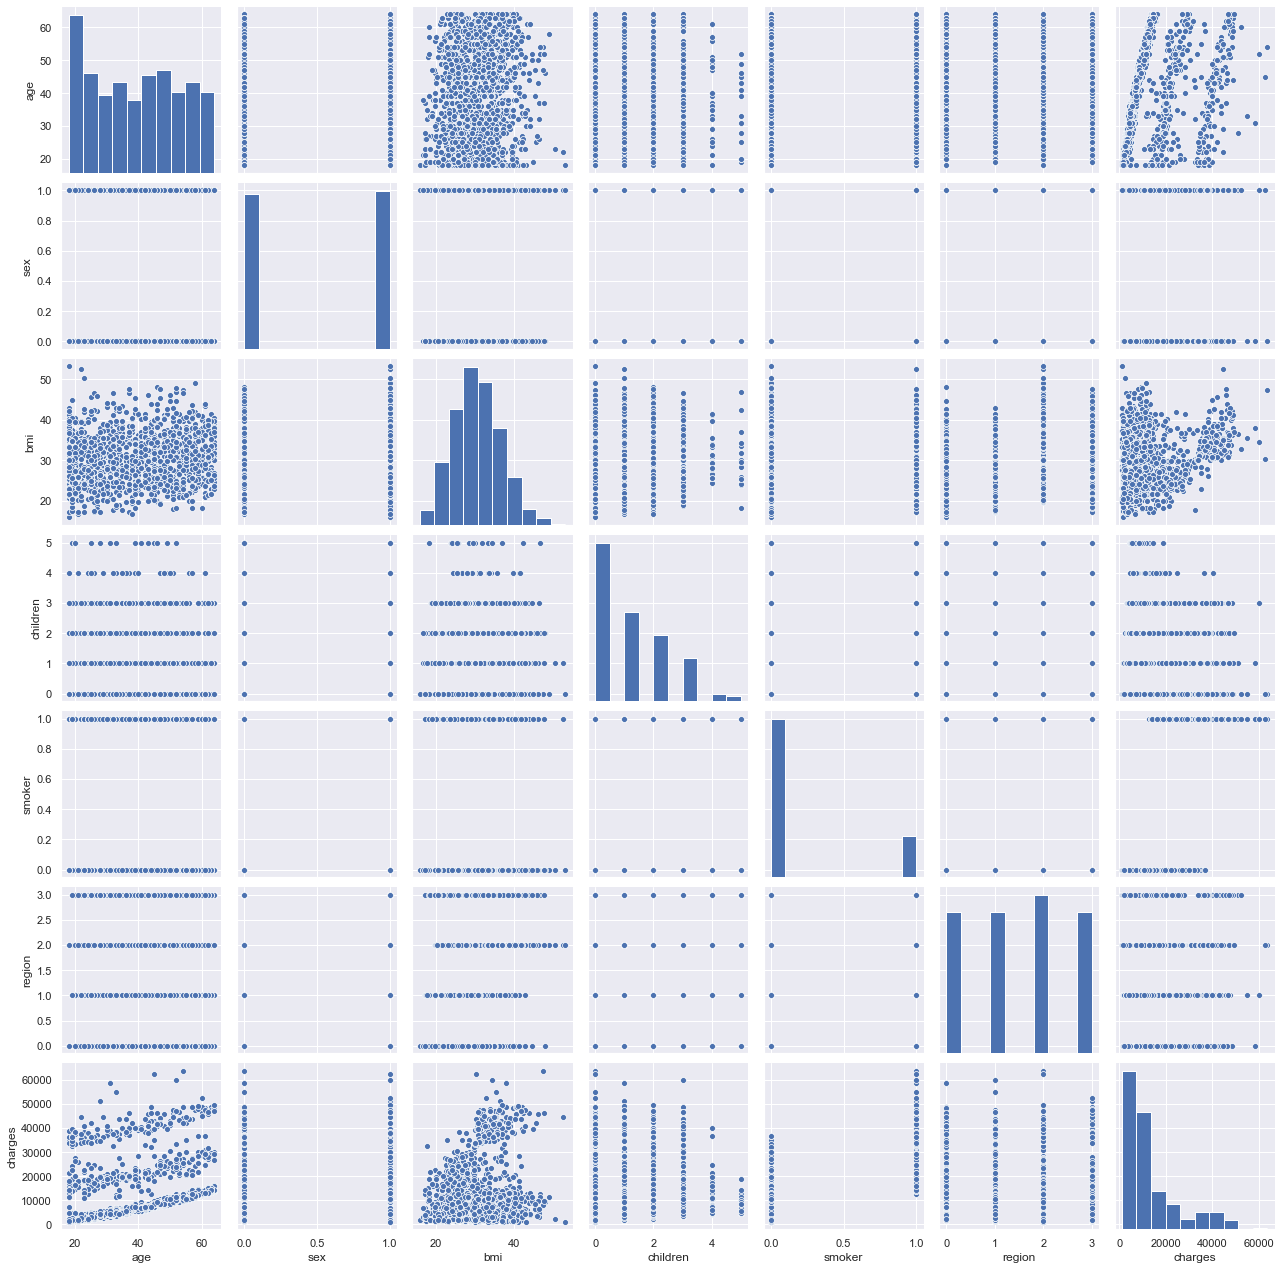

In [22]:
#Label encoding the variables before doing a pairplot because pairplot ignories strings

insurance_df_encoded= copy.deepcopy(insurance_df)
insurance_df_encoded.loc[:,['sex','smoker','region']] = insurance_df_encoded.loc[:,['sex','smoker','region']].apply(LabelEncoder().fit_transform)

sns.pairplot(insurance_df_encoded)  #pairplot
plt.show()

<strong>Output should include this Analysis:</strong>
    <p>-there is an obvious correlation between 'charges' and 'smoker'<p>
    <p>-Looks like smokers claimed more money than non-smokers<p>
    <p>-There is an interesting pattern between 'age' and 'charges'.Notice that older people are changed more than the younger ones<p>

## Task5: Analyzing trends,patterns, and relationships in the Data

In [16]:
# Do charges of people who smoke differ significantly from the people who do not?

print('Do charges of people who smoke differ significantly from the people who do not? ')

insurance_df.smoker.value_counts()

Do charges of people who smoke differ significantly from the people who do not? 


no     1064
yes     274
Name: smoker, dtype: int64

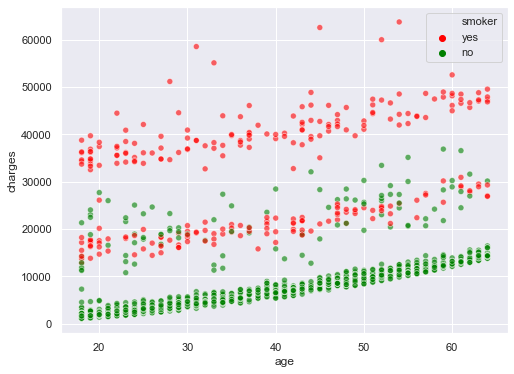

In [17]:
# Scatterplot to look for visual evidence of dependency between attributes smoker and charges accross different ages

plt.figure(figsize=(8,6))
sns.scatterplot(insurance_df.age,insurance_df.charges,hue=insurance_df.smoker,palette=['red','green'],alpha=0.6)

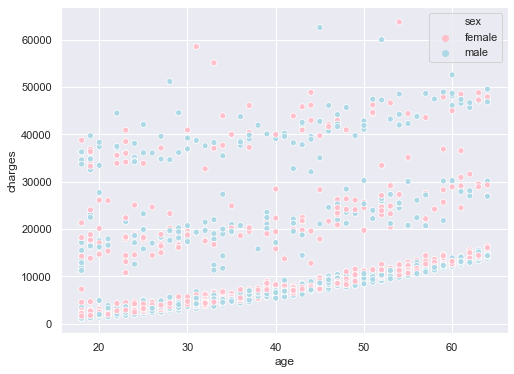

In [18]:
plt.figure(figsize=(8,6))
sns.scatterplot(insurance_df.age,insurance_df.charges,hue=insurance_df.sex,palette=['pink','lightblue'])

There is no apparent relation between gender and charges

In [19]:
#T-test to check dependecy of smoking on charges

Ho="Charges of smoker and non-smoker are same" #Stating the Null Hypothesis
Ha="Charges of smoker and non-smoker are not the same" #Stating the Alternate Hypothesis

x=np.array(insurance_df[insurance_df.smoker=='yes'].charges) #Selecting charges corresponding to smokers as an array
y=np.array(insurance_df[insurance_df.smoker=='no'].charges) #Selecting charges corresponding to non-smokers as an array

t,p_value =stats.ttest_ind(x,y,axis=0) #Performing an Independent t-test

if p_value <0.05: #Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value}) <0.05')
else:
    print(f'{Ho} as the p_value ({p_value}) >0.05')

Charges of smoker and non-smoker are not the same as the p_value (8.271435842177219e-283) <0.05


In [20]:
#Thus ,Smokers seem to claim significanty more money than non-smokers

In [22]:
# Does bmi of males differ significantly from that of females?
print('Does bmi of males differ significantly from that of females?')

insurance_df.sex.value_counts() #Checking the distribution of males and females

Does bmi of males differ significantly from that of females?


male      676
female    662
Name: sex, dtype: int64

In [23]:
#T-test to check dependency of bmi on gender

Ho="Gender has no effect on bmi" #Stating the Null Hypothesis
Ha="Gender has an effect on bmi" #Stating the Alternate Hypothesis

x=np.array(insurance_df[insurance_df.sex=='male'].bmi) #Selecting charges corresponding to smokers as an array
y=np.array(insurance_df[insurance_df.sex=='female'].bmi) #Selecting charges corresponding to non-smokers as an array

t,p_value =stats.ttest_ind(x,y,axis=0) #Performing an Independent t-test

if p_value <0.05: #Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value}) <0.05')
else:
    print(f'{Ho} as the p_value ({p_value}) >0.05')

Gender has no effect on bmi as the p_value (0.08997637178984934) >0.05


In [24]:
#bmi of both the genders are identical

In [25]:
# Is the proportion of smokers significantly different in different genders?

#Chi_square test to check if smoking habits are different for different genders

Ho="Gender has no effect on smoking habits" #Stating the Null Hypothesis
Ha="Gender has an effect on smoking habits" #Stating the Alternate Hypothesis

crosstab=pd.crosstab(insurance_df['sex'],insurance_df['smoker']) #Contingency table of sex and smoker attributes

chi,p_value,dof,expected =stats.chi2_contingency(crosstab)

if p_value <0.05: #Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) <0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) >0.05')

crosstab

Gender has an effect on smoking habits as the p_value (0.007) <0.05


smoker,no,yes
sex,,
female,547,115
male,517,159


In [26]:
#Proportion of smokers in males is significantly different from that of the females

In [27]:
#Chi_square test to check if smoking habits are different for people of different regions

Ho="Region has no effect on smoking habits" #Stating the Null Hypothesis
Ha="Region has an effect on smoking habits" #Stating the Alternate Hypothesis

crosstab=pd.crosstab(insurance_df['smoker'],insurance_df['region']) #Contingency table of sex and smoker attributes

chi,p_value,dof,expected =stats.chi2_contingency(crosstab)

if p_value <0.05: #Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) <0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) >0.05')

crosstab

Region has no effect on smoking habits as the p_value (0.062) >0.05


region,northeast,northwest,southeast,southwest
smoker,,,,
no,257,267,273,267
yes,67,58,91,58


In [28]:
#Smoking habbits of people of different regions are similar

In [29]:
#is the distribution of bmi across women with no children,one child and two children,the same?
#Test to see if the distributions of bmi values for females having different number of children,are significantly different

Ho="No. of children has no effect on bmi" #Stating the Null Hypothesis
Ha="no. of children has an effect on bmi" #Stating the Alternate Hypothesis

female_df=copy.deepcopy(insurance_df[insurance_df['sex']=='female'])

zero=female_df[female_df.children==0]['bmi']
one=female_df[female_df.children==1]['bmi']
two=female_df[female_df.children==2]['bmi']

f_stat ,p_value =stats.f_oneway(zero,one,two)


if p_value <0.05: #Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) <0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) >0.05')

No. of children has no effect on bmi as the p_value (0.716) >0.05
